## Credit Fraud Predictor


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. (Kaggle)


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/datastudents-performance-in-exams?datasetId=74977
- The data consists of 31 columns and 284808 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/creditcard.csv')

#### Show Top 5 Records

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Shape of the dataset

In [7]:
df.shape

(284807, 31)

In [8]:
# Determin number of fraud cases and plot

fraud = df[df["Class"] == 1]
valid = df[df["Class"] == 0]

print(f"Fraud Transactions: {len(fraud)} ")
print(f"Total Transactions: {len(valid)}")
print(f"Fraction of fraud and non fraud: {len(fraud)/ len(valid)}")

Fraud Transactions: 492 
Total Transactions: 284315
Fraction of fraud and non fraud: 0.0017304750013189597


- The dataset contains transactions made by credit cards in September 2013 by European cardholders. (Kaggle)

- This dataset presents transactions that occurred in **two days**, where we have 
**492 frauds out of 284,807 transactions**. The dataset is highly unbalanced, the positive class (frauds) account for **0.172%** of all transactions. (Kaggle)


### 2.2 Dataset information

The dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. (For interpretability)
        
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. (Kaggle)



### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

1081

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [11]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### 3.5 Check statistics of data set

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Insight
- Means of all the variables are 0 because they were proccessed from PCA, except for variable 'Time' and 'Amount'
- After 172,792 second, last transaction happened and also it is the end of day 2
- **Average amount** of transaction is 88.349619 dollars with the **largest amount** of 25,691.16 dollars

### 3.7 Exploring Data

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
print("Categories in 'Class' variable:     ",end=" " )
print(df['Class'].unique())

Categories in 'Class' variable:      [0 1]


- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 31 numerical features : ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

We have 0 categorical features : []


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram between Fraud and Non-Fraud transactions

Text(0, 0.5, 'Number of Transactions')

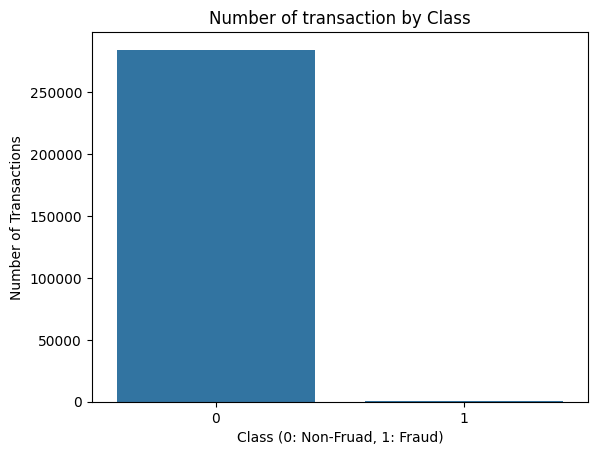

In [17]:
# Plot the difference
tmp = df.groupby("Class")['Amount'].count()

# Convert Series to DataFrame and reset index to make 'Class' a column
fraud_count = pd.DataFrame(tmp).reset_index()

sns.barplot(data= fraud_count,x="Class" ,y= "Amount" )
plt.title("Number of transaction by Class")
plt.xlabel("Class (0: Non-Fruad, 1: Fraud)")
plt.ylabel('Number of Transactions')

#####  Insights
- Mostly non-fraud transactions

#### 4.1.2 Distribution of 'Amount' and 'Time'

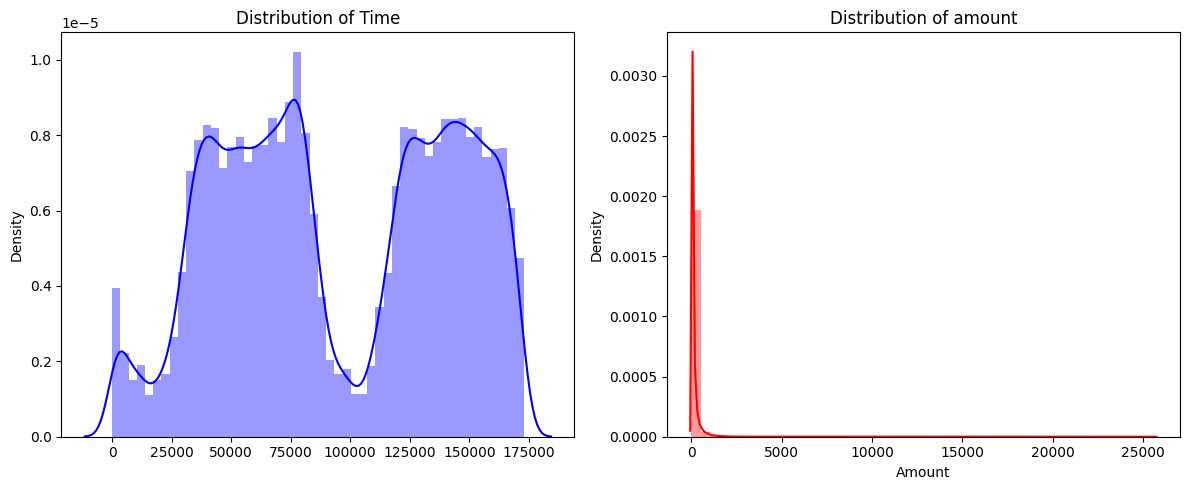

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# (1) Prepare data
time_arr = df['Time'].values
amount_arr = df['Amount'].values

# (2) Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot 1: Bar chart ---
sns.distplot(time_arr, color = "b", ax= axes[0])
axes[0].set_title("Distribution of Time")


# --- Plot 2: Distribution plot ---
sns.distplot(amount_arr, color='r', ax=axes[1])
axes[1].set_title("Distribution of amount")
axes[1].set_xlabel("Amount")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#####  Insights
- We can observe that the distributition of amount is skewed and both distribitions do not follow normal distribution 
    
    => Using **Robust Scaler** instead of **Standard Scaler** since robust scaler is less sensitive with outlier

#### 4.1.3 Distribution of time for fraud transactions

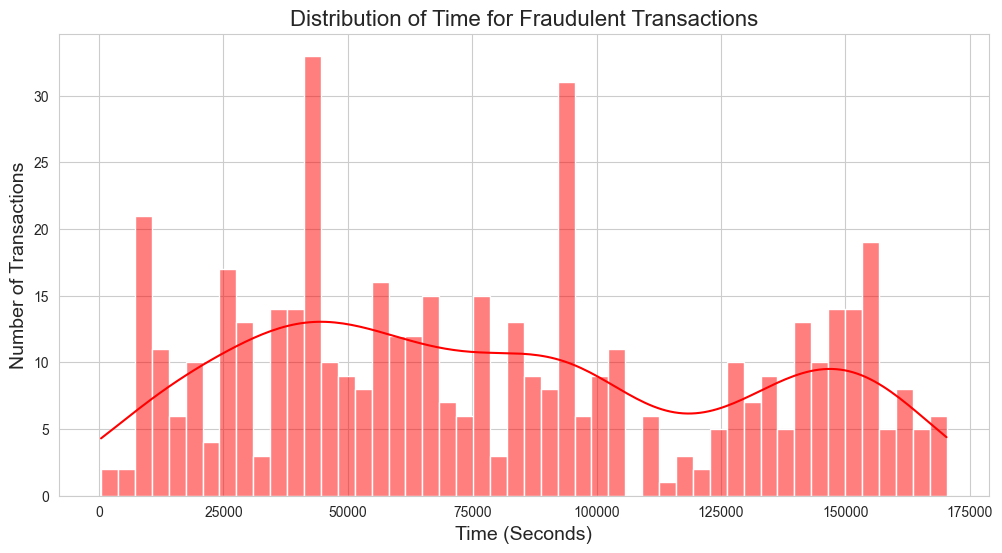

In [21]:
# Filter the DataFrame to include only fraudulent transactions
fraud_trans = df[df['Class'] == 1]

# Set the style of seaborn plots
sns.set_style('whitegrid')

# Create a figure and axis to customize the plot size
plt.figure(figsize=(12, 6))

# Plot the distribution using seaborn's histplot
sns.histplot(fraud_trans['Time'], bins=50, color='red', kde=True)

# Add titles and labels
plt.title('Distribution of Time for Fraudulent Transactions', fontsize=16)
plt.xlabel('Time (Seconds)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

# Display the plot
plt.show()

#### Insights
- This is very hard to inteprete the time of the day.
- Let's convert seconds to time of the day between 2 days period

In [1]:
# Convert 'Time' to Time Delta
df['Time_Delta'] = pd.to_timedelta(df['Time'], unit='s')

# Create a Reference Start Date
start_date = pd.to_datetime('2025-01-01')  # can use any arbitrary date

#Add Time Delta to Start Date to Get Timestamp
df['Timestamp'] = start_date + df['Time_Delta']

# Extract Time of Day
df['Time_of_Day'] = df['Timestamp'].dt.time

#extract the hour for grouping
df['Hour'] = df['Timestamp'].dt.hour

# Filter fraudulent transactions
fraud_trans = df[df['Class'] == 1]

# Group by 'Hour' and count the number of transactions
fraud_by_hour = fraud_trans.groupby('Hour').size().reset_index(name='Fraud_Count')


NameError: name 'pd' is not defined

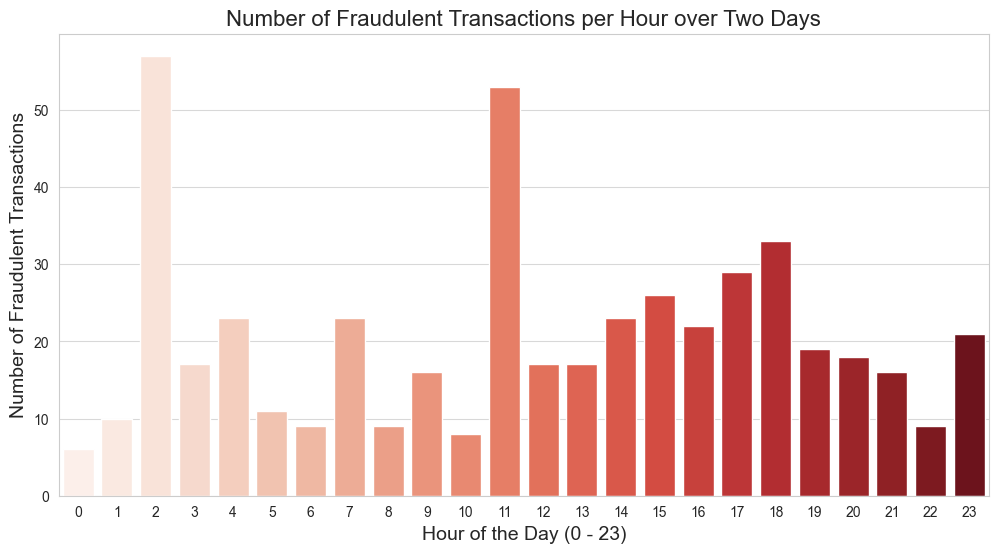

In [35]:
# Set the style for seaborn
sns.set_style('whitegrid')

# Create a figure
plt.figure(figsize=(12, 6))

# Plot the bar chart
sns.barplot(data=fraud_by_hour, x='Hour', y='Fraud_Count', palette='Reds')

# Customize the plot
plt.title('Number of Fraudulent Transactions per Hour over Two Days', fontsize=16)
plt.xlabel('Hour of the Day (0 - 23)', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.xticks(range(0, 24))  # Ensure all hours are represented
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

#### 4.1.4 Distribution of time for fraud transactions by day

In [38]:
# Number of seconds in a day
seconds_in_day = 86400

# Calculate the day (0 for first day, 1 for second day)
df['Day'] = (df['Time'] // seconds_in_day).astype(int)

# Filter fraudulent transactions
fraud_transactions = df[df['Class'] == 1]

# Group by 'Day' and 'Hour'
fraud_by_day_hour = fraud_transactions.groupby(['Day', 'Hour']).size().reset_index(name='Fraud_Count')

# Pivot the data to have days as columns and hours as rows
fraud_pivot = fraud_by_day_hour.pivot(index='Hour', columns='Day', values='Fraud_Count').fillna(0)


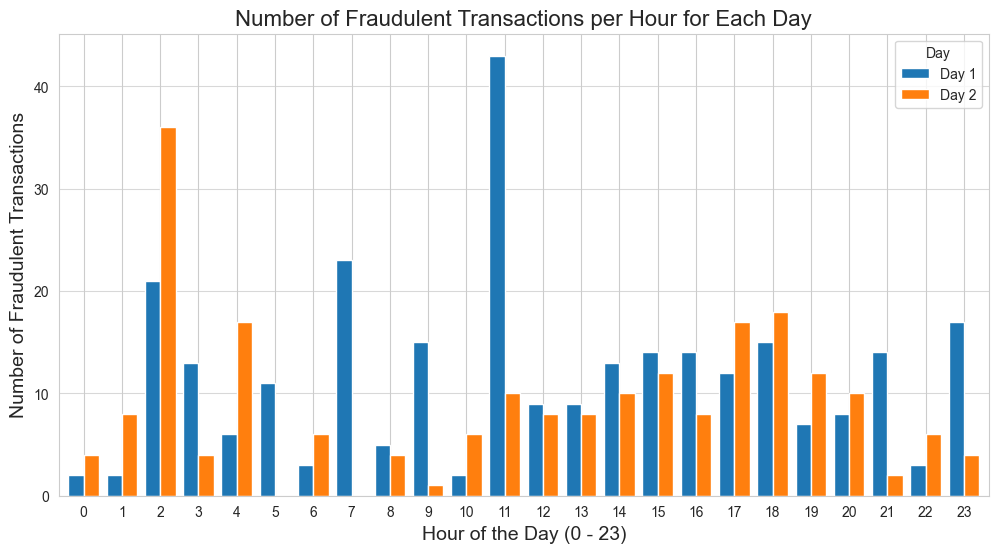

In [39]:
# Plot the grouped bar chart
fraud_pivot.plot(kind='bar', figsize=(12, 6), width=0.8)

# Customize the plot
plt.title('Number of Fraudulent Transactions per Hour for Each Day', fontsize=16)
plt.xlabel('Hour of the Day (0 - 23)', fontsize=14)
plt.ylabel('Number of Fraudulent Transactions', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Day', labels=['Day 1', 'Day 2'])
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

#### Insights
- Fraud counts vary significantly across hours.